In [38]:
import pandas as pd
import numpy as np

In [39]:
# Import interpolated Company_Data file
df_company_data = pd.read_csv(r"C:\Users\eugin\OneDrive\Документы\Traning\POWER_BI\MF_Training\PROJECTS\Mock_Sales"
                                r"\Project_2_2023_Mock_Set\06-company_data_interpolated.csv")

In [40]:
# Import interpolated Product_Sales file
df_product_sales_data = pd.read_csv(r"C:\Users\eugin\OneDrive\Документы\Traning\POWER_BI\MF_Training\PROJECTS\Mock_Sales"
                                    r"\Project_2_2023_Mock_Set\03-product_sales_interpolated_data.csv")

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Overview product_sales_data dataset 
df_product_sales_data['Date'].value_counts().head()

Date
2019-01-01    4
2019-02-01    4
2021-09-01    4
2021-10-01    4
2021-11-01    4
Name: count, dtype: int64

In [43]:
# Overview product_sales_data dataset 
df_company_data['Date'].value_counts().head()

Date
2019-01-01    1
2019-02-01    1
2021-09-01    1
2021-10-01    1
2021-11-01    1
Name: count, dtype: int64

In [44]:
# Step 1: Aggregate Revenue from the Product Sales dataset by Date
df_grouped_product = (df_product_sales_data.groupby('Date', as_index=False)['Revenue'].sum().rename(columns={'Revenue':'Revenue'}))

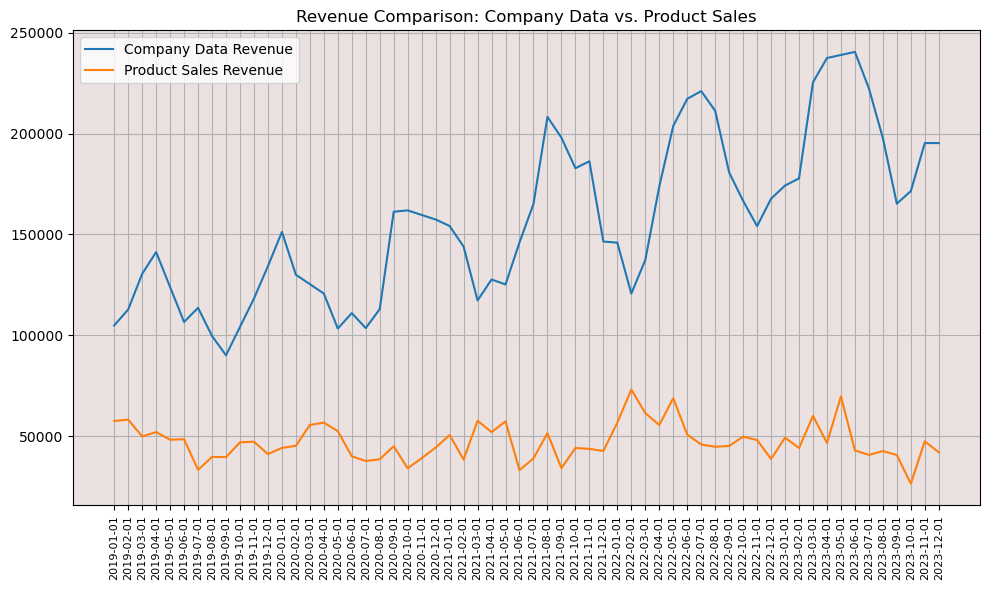

In [45]:
# Step 2: Compare Revenue values from Company Data and Product Sales
# This chart shows that the values differ significantly between datasets
fig,ax = plt.subplots(figsize=(10,6))
ax.plot(df_company_data['Date'], df_company_data['Revenue'], label='Company Data Revenue')
ax.plot(df_grouped_product['Date'], df_grouped_product['Revenue'], label='Product Sales Revenue')
ax.set_facecolor('#ebe1e1') 
plt.title('Revenue Comparison: Company Data vs. Product Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show();

In [46]:
# Step 3: Merge both Revenue columns into a single dataset for comparison
df_merged = pd.merge(df_company_data[['Date','Revenue']].rename(columns={'Revenue':'Company_Revenue'}),
                   df_grouped_product[['Date','Revenue']].rename(columns={'Revenue':'Product_Revenue'}),
                   on='Date',
                   how='inner')

In [47]:
# Step 4: Summary statistics to confirm differences
# The metrics (mean, std, min, max) indicate significant variance between the two sources
df_merged[['Company_Revenue', 'Product_Revenue']].describe().round()

,Company_Revenue,Product_Revenue
count,60.0,60.0
mean,157047.0,47271.0
std,40490.0,9169.0
min,90152.0,26551.0
25%,123164.0,40784.0
50%,154174.0,45642.0
75%,183693.0,52112.0
max,240438.0,73182.0


In [48]:
# Step 5: Correlation analysis
# A very low correlation confirms that there's no strong linear relationship
correlation = df_merged['Company_Revenue'].corr(df_merged[ 'Product_Revenue'])
print(f"Correlation: {correlation:.4f}")

Correlation: 0.0196


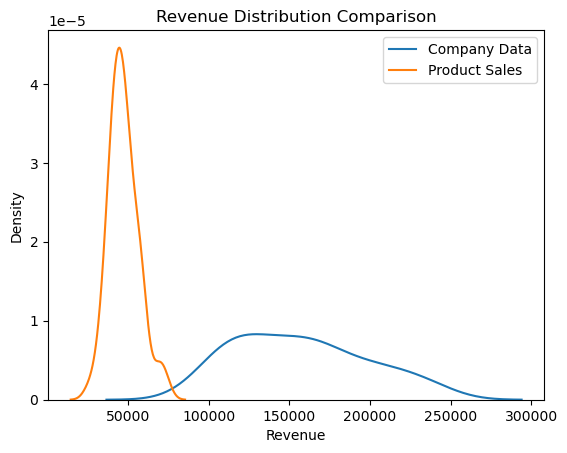

In [49]:
# Step 6: Visualize revenue distribution
# KDE plots illustrate how the revenue distributions diverge between datasets
sns.kdeplot(df_company_data['Revenue'], label='Company Data')
sns.kdeplot(df_grouped_product['Revenue'], label='Product Sales')
plt.legend(); plt.title("Revenue Distribution Comparison");

In [50]:
# Save Merged Revenue Data
df_merged.to_csv(r"C:\Users\eugin\OneDrive\Документы\Traning\POWER_BI\MF_Training\PROJECTS\Mock_Sales"
                r"\Project_2_2023_Mock_Set\08-revenue_comparison.csv", index=False)

In [51]:
# Collect Revenue distribution to one dataset 
df_kde = df_merged[['Company_Revenue', 'Product_Revenue']].copy()

In [52]:
# Save Revenue distribution
df_kde.to_csv(r"C:\Users\eugin\OneDrive\Документы\Traning\POWER_BI\MF_Training\PROJECTS\Mock_Sales"
                r"\Project_2_2023_Mock_Set\009-revenue_distribution.csv", index=False)

In [53]:
# Save Correlation value
corr_df = pd.DataFrame({'Metric': ['Correlation'], 'Value': [correlation]})
corr_df.to_csv(r"C:\Users\eugin\OneDrive\Документы\Traning\POWER_BI\MF_Training\PROJECTS\Mock_Sales"
                r"\Project_2_2023_Mock_Set\09-revenue_correlation.csv", index=False)

In [54]:
# Preparing a dataset to approximate a KDE distribution for use in a Power BI line chart
from scipy.stats import gaussian_kde

# Assuming these are your Series
x_company = df_company_data['Revenue'].dropna()
x_product = df_product_sales_data['Revenue'].dropna()

# KDE values
kde_company = gaussian_kde(x_company)
kde_product = gaussian_kde(x_product)

x_grid = np.linspace(min(x_company.min(), x_product.min()), max(x_company.max(), x_product.max()), 200)
df_kde = pd.DataFrame({
    'Revenue': x_grid,
    'Company_Density': kde_company(x_grid),
    'Product_Density': kde_product(x_grid)
})


In [55]:
# Save KDE values
df_kde.to_csv(r"C:\Users\eugin\OneDrive\Документы\Traning\POWER_BI\MF_Training\PROJECTS\Mock_Sales"
                r"\Project_2_2023_Mock_Set\10-kde_revenue.csv", index=False)